In [1]:
# To check the correlation between the variables ​​of Mental Health Condition and Access to Mental Health Resources, 
# I will use the Chi-square test.

# Access_to_Mental_Health_Resources: Yes, No
# Mental_Health_Condition: Depression, Anxiety, None, Burnout

In [1]:
import pandas as pd
from scipy.stats import chi2_contingency

In [70]:
file_path = 'excel/Correlation2.xlsx'  
data = pd.read_excel(file_path)

# check
print(data.head())

  Access_to_Mental_Health_Resources Mental_Health_Condition
0                                No              Depression
1                                No                 Anxiety
2                                No                 Anxiety
3                               Yes              Depression
4                               Yes                     NaN


In [71]:
# Change NaN to "None"
data['Mental_Health_Condition'] = data['Mental_Health_Condition'].fillna('None')

In [72]:
# check
print(data.head())

  Access_to_Mental_Health_Resources Mental_Health_Condition
0                                No              Depression
1                                No                 Anxiety
2                                No                 Anxiety
3                               Yes              Depression
4                               Yes                    None


In [8]:
print(data['Mental_Health_Condition'].unique())

['Depression' 'Anxiety' 'None' 'Burnout']


In [73]:
# Contingency table
contingency_table = pd.crosstab(data['Mental_Health_Condition'], data['Access_to_Mental_Health_Resources'])

print(contingency_table)

Access_to_Mental_Health_Resources   No  Yes
Mental_Health_Condition                    
Anxiety                            646  632
Burnout                            665  615
Depression                         614  632
None                               628  568


In [74]:
# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-squared: 3.130762269577091
P-value: 0.37190029737865
Degrees of freedom: 3
Expected frequencies: [[652.5468 625.4532]
 [653.568  626.432 ]
 [636.2076 609.7924]
 [610.6776 585.3224]]


In [75]:
# Interpretation

if p < 0.05:
    print("There is a statistically significant relationship between the presence of health problems and access to mental health resources.")
else:
    print("There is no statistically significant relationship between the presence of health problems and access to mental health resources.")

There is no statistically significant relationship between the presence of health problems and access to mental health resources.


In [ ]:
# Let's build a Heat map

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

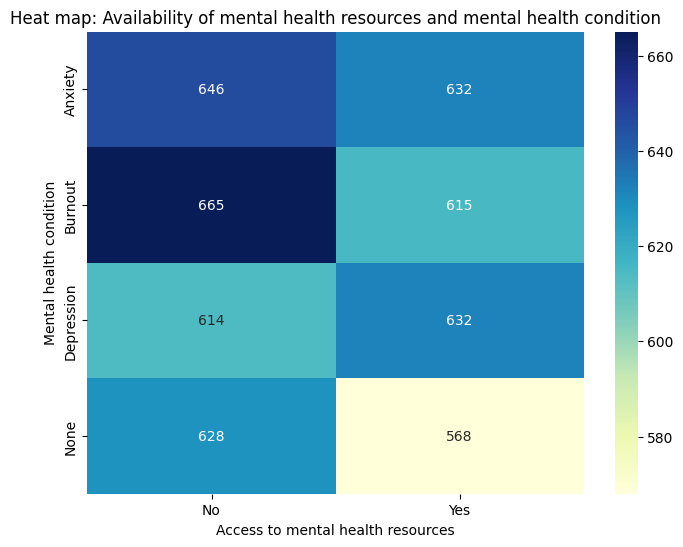

In [79]:
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heat map: Availability of mental health resources and mental health condition')
plt.xlabel('Access to mental health resources')
plt.ylabel('Mental health condition')
plt.show()

In [21]:
# Next, I analyze the relationship between these variables, but only for Remote Employees

In [4]:
file_path = 'C:/Users/oneli/Portfolio/Correlation2.Remote.xlsx'  #'excel/Correlation2.Remote.xlsx'
data = pd.read_excel(file_path)

In [7]:
data['Mental_Health_Condition'] = data['Mental_Health_Condition'].fillna('None')
print(data.head())

  Access_to_Mental_Health_Resources Mental_Health_Condition
0                                No                 Anxiety
1                               Yes                 Anxiety
2                               Yes                    None
3                               Yes              Depression
4                               Yes                 Anxiety


In [8]:
# Contingency table
contingency_table = pd.crosstab(data['Mental_Health_Condition'], data['Access_to_Mental_Health_Resources'])

print(contingency_table)

Access_to_Mental_Health_Resources   No  Yes
Mental_Health_Condition                    
Anxiety                            235  208
Burnout                            238  200
Depression                         194  219
None                               229  191


In [25]:
# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-squared: 6.3573884495402195
P-value: 0.09545964803848965
Degrees of freedom: 3
Expected frequencies: [[231.57992999 211.42007001]
 [228.96616103 209.03383897]
 [215.89731622 197.10268378]
 [219.55659277 200.44340723]]


In [26]:
# Interpretation

if p < 0.05:
    print("There is a statistically significant relationship between the presence of health problems and access to mental health resources.")
else:
    print("There is no statistically significant relationship between the presence of health problems and access to mental health resources.")

There is no statistically significant relationship between the presence of health problems and access to mental health resources.


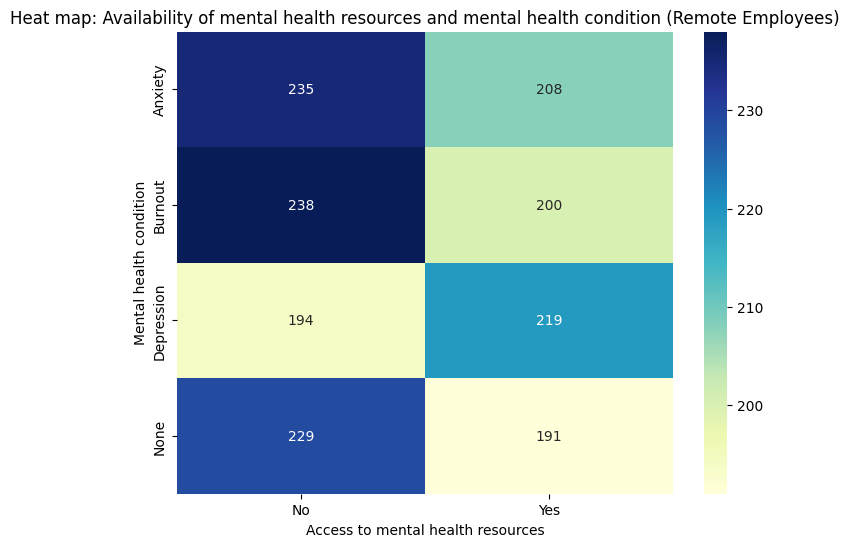

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heat map: Availability of mental health resources and mental health condition (Remote Employees)')
plt.xlabel('Access to mental health resources')
plt.ylabel('Mental health condition')
plt.show()

In [ ]:
# Chi-square test shows that there is no dependence between the studied variables.

# But on the Heat map, we can see that when there is access to mental health resources, 
# there are fewer cases of burnout and anixiety than when there is no. 

# Therefore, we will try to apply Logistic Regression to further study these variables.

In [28]:
# Logistic Regression

In [1]:
import pandas as pd
import statsmodels.api as sm

In [46]:
data = pd.read_excel('excel/Correlation2.xlsx')

print(data.head())

  Access_to_Mental_Health_Resources Mental_Health_Condition
0                                No              Depression
1                                No                 Anxiety
2                                No                 Anxiety
3                               Yes              Depression
4                               Yes                     NaN


In [47]:
data['Mental_Health_Condition'] = data['Mental_Health_Condition'].fillna('None')
print(data.head())

  Access_to_Mental_Health_Resources Mental_Health_Condition
0                                No              Depression
1                                No                 Anxiety
2                                No                 Anxiety
3                               Yes              Depression
4                               Yes                    None


In [63]:
# Conversion of categorical variables into numerical ones

data = pd.get_dummies(data, columns=['Mental_Health_Condition'], drop_first=True)
print(data.head())

  Access_to_Mental_Health_Resources  Mental_Health_Condition_Burnout  \
0                                No                            False   
1                                No                            False   
2                                No                            False   
3                               Yes                            False   
4                               Yes                            False   

   Mental_Health_Condition_Depression  Mental_Health_Condition_None  
0                                True                         False  
1                               False                         False  
2                               False                         False  
3                                True                         False  
4                               False                          True  


In [55]:
# Creating binary variables for each health problem

data_encoded['Depression'] = (data_encoded['Mental_Health_Condition_Depression'] == 1).astype(int)
data_encoded['Burnout'] = (data_encoded['Mental_Health_Condition_Burnout'] == 1).astype(int)
data_encoded['None'] = (data_encoded['Mental_Health_Condition_None'] == 1).astype(int)
data_encoded['Anxiety'] = (data_encoded['Mental_Health_Condition_Anxiety'] == 1).astype(int)

In [54]:
# check
print(data_encoded.head())

  Access_to_Mental_Health_Resources  Mental_Health_Condition_Anxiety  \
0                                No                            False   
1                                No                             True   
2                                No                             True   
3                               Yes                            False   
4                               Yes                            False   

   Mental_Health_Condition_Burnout  Mental_Health_Condition_Depression  \
0                            False                                True   
1                            False                               False   
2                            False                               False   
3                            False                                True   
4                            False                               False   

   Mental_Health_Condition_None  
0                         False  
1                         False  
2                   

In [64]:
# check
print(data.columns)

Index(['Access_to_Mental_Health_Resources', 'Mental_Health_Condition_Burnout',
       'Mental_Health_Condition_Depression', 'Mental_Health_Condition_None'],
      dtype='object')


In [51]:
data_encoded = pd.get_dummies(data, columns=['Mental_Health_Condition'])

In [52]:
# check
print(data['Mental_Health_Condition'].value_counts())

Mental_Health_Condition
Burnout       1280
Anxiety       1278
Depression    1246
None          1196
Name: count, dtype: int64


In [59]:
data_encoded['Access_to_Mental_Health_Resources'] = data_encoded['Access_to_Mental_Health_Resources'].map({'Yes': 1, 'No': 0})

In [53]:
# check
print(data_encoded.columns)

Index(['Access_to_Mental_Health_Resources', 'Mental_Health_Condition_Anxiety',
       'Mental_Health_Condition_Burnout', 'Mental_Health_Condition_Depression',
       'Mental_Health_Condition_None'],
      dtype='object')


In [40]:
if 'Mental_Health_Condition_Anxiety' in data_encoded.columns:
    data_encoded['Anxiety'] = (data_encoded['Mental_Health_Condition_Anxiety'] == 1).astype(int)

In [65]:
# let's run a logistic regression for Anxiety:

X = sm.add_constant(data_encoded['Access_to_Mental_Health_Resources'])  # constant
y = data_encoded['Anxiety']  # dependent variable

# logistic regression model
model = sm.Logit(y, X)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.568386
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Anxiety   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4998
Method:                           MLE   Df Model:                            1
Date:                Sun, 20 Oct 2024   Pseudo R-squ.:               3.172e-05
Time:                        19:21:14   Log-Likelihood:                -2841.9
converged:                       True   LL-Null:                       -2842.0
Covariance Type:            nonrobust   LLR p-value:                    0.6711
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -1.0825      0.046    -23

In [ ]:
# Conclusion for Anxiety: 

# The coefficient of 0.0275 for the variable Access_to_Mental_Health_Resources shows that having access to resources has a very small effect 
# on the probability of anxiety. The coefficient is positive, but its value is very close to zero, which indicates practically no influence.

# The value of p = 0.671 is significantly greater than the standard level of significance (0.05), which means that there is no statistically 
# significant relationship between access to health resources and the presence of anxiety. 
# That is, changing access to the mental health resources has no significant effect on the probability of anxiety.

In [62]:
# logistic regression for Burnout:

X = sm.add_constant(data_encoded['Access_to_Mental_Health_Resources'])  # constant
y = data_encoded['Burnout']  # dependent variable

# logistic regression model
model = sm.Logit(y, X)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.568776
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Burnout   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4998
Method:                           MLE   Df Model:                            1
Date:                Fri, 18 Oct 2024   Pseudo R-squ.:               9.657e-05
Time:                        17:54:03   Log-Likelihood:                -2843.9
converged:                       True   LL-Null:                       -2844.2
Covariance Type:            nonrobust   LLR p-value:                    0.4586
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -1.0435      0.045    -23

In [ ]:
# Conclusion for Burnout:

# Pseudo R-squared (Pseudo R-squ.: 9.657e-05): Pseudo R² is very low, indicating that the model does not explain well the variation in variable burnout.

# Access_to_Mental_Health_Resources (-0.0481): Coefficient for the access to resources variable. It shows the effect of access to the 
# mental health resources on the probability of burnout. The negative sign suggests that having access to resources reduces the likelihood of burnout, 
# but the effect is very small. 

# However, this result is not statistically significant (p-value 0.459, which is greater than the threshold level of 0.05).

In [ ]:
# General Conclusionfor Anxiety and Burnout:

# Access to the mental health resources has no significant effect on the presence of anxiety and burnout among the interviewed employees. 
# The model barely explains the variation in levels of anxiety and burnout, and the result indicates no statistically significant relationship between 
# the independent and dependent variables.